<a href="https://colab.research.google.com/github/jamahalwin/chicago-crime-analysis/blob/master/ML_Chicago_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chicago Crime Analysis

In [0]:
# Use seaborn for pairplot
!pip install seaborn

# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [0]:
dataset_path =  keras.utils.get_file('chicago-crime-sample', 'https://raw.githubusercontent.com/jamahalwin/chicago-crime-analysis/master/Chicago_Crimes_Project_Data.csv')
dataset_path

'/root/.keras/datasets/chicago-crime-sample'

In [0]:
#column_names = ['ID','Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
#                'Description', 'Location_Description', 'Arrest',
#                'Domestic', 'Beat', 'District', 'Ward', 'Community_Area',
#                'FBI_Code', 'X_Coordinate', 'Y_Coordinate', 'Year', 'Updated_On',
#                'Latitude', 'Longitude', 'Location']
raw_dataset = pd.read_csv(dataset_path,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.head()

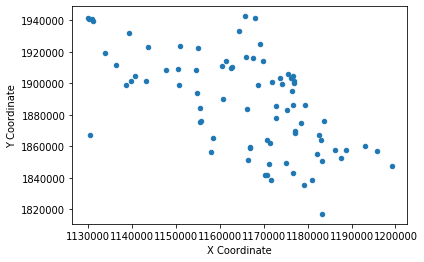

In [0]:
dataset.plot(kind='scatter',x='X Coordinate',y='Y Coordinate')
plt.show()